# Statystyczne metody przetwarzania danych 

## Laboratorium 2 - algorytm Najbliższego Sąsiada (NN)


### Opis
Celem jest zbadanie danych i opracowanie algorytmu klasyfikacji liści. Do tego celu należy zaimplementować i zastosować klasyfikator najbliższego sąsiada - NN (Nearest Neighbor).

Ukończony projekt powinien:
* Klasyfikować dwie klasy liści:
    * `Populus nigra` - klasa nr 3, 
    * `Quercus robur` - klasa nr 5.

### Zbiór danych

Zbiór danych znajduje się w `dataset/dataset.npz`. Jest to zbiór danych pobrany i zmodyfikowany z adresu: <https://archive.ics.uci.edu/ml/datasets/leaf>.

### Przesyłanie zadań

Wszystkie pliki należy spakować archiwizatorem **zip** i przesłać za pośrednictwem platformy WIKAMP. Poniżej oczekiwana zawartość archiwum:

```
+-- 📂 [IMIE I NAZWISKO].zip
    +-- 📜 Lab01.ipynb
    +-- 📂 dataset
        +-- 📜 dataset.npz
        +-- 📜 ReadMe.pdf
```

### Zadanie 1

Wczytaj dane z pliku `dataset.npz`. Plik ten zawiera zbiór danych podzielony na dwa podzbiory: treningowy `train` i testowy `test`. Każdy z nich zawiera cechy oraz indeksy klas. Dokładny opis zbioru danych znajduje się w pliku `ReadMe.pdf`.

> Podpowiedź: Możesz wykorzystać poniższy kod:
```python
with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']
```

In [1]:
import numpy as np
with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']

### Zadanie 2

Sprawdź: 
* ile jest wszystkich próbek z zbiorze, 
* ile jest próbek w poszczegónych klasach.

Czy zauważyłeś jakieś problemy związane z tym zbiorem danych?

In [2]:
len(train)

2244

In [3]:
#len(train[train[:, 0] == 5])
#collections.counter
for i in range(1,41):
    print(f"Klasa {i}: {sum(train[:,0] == i)}")

Klasa 1: 77
Klasa 2: 66
Klasa 3: 55
Klasa 4: 66
Klasa 5: 77
Klasa 6: 44
Klasa 7: 44
Klasa 8: 33
Klasa 9: 121
Klasa 10: 88
Klasa 11: 88
Klasa 12: 77
Klasa 13: 99
Klasa 14: 66
Klasa 15: 66
Klasa 16: 0
Klasa 17: 0
Klasa 18: 0
Klasa 19: 0
Klasa 20: 0
Klasa 21: 0
Klasa 22: 121
Klasa 23: 77
Klasa 24: 77
Klasa 25: 66
Klasa 26: 99
Klasa 27: 55
Klasa 28: 66
Klasa 29: 110
Klasa 30: 77
Klasa 31: 77
Klasa 32: 66
Klasa 33: 66
Klasa 34: 99
Klasa 35: 88
Klasa 36: 33
Klasa 37: 0
Klasa 38: 0
Klasa 39: 0
Klasa 40: 0


In [4]:
"""
Wszystkich probek jest 2244
"""

'\nWszystkich probek jest 2244\n'

### Zadanie 3

Wybierz wiersze należące do poniższych klas (rodzaje liści) i zapisz w zmiennych `train_new` oraz `test_new`:
* `Populus nigra` - klasa nr 3, 
* `Quercus robur` - klasa nr 5.

Aby wybrać jedynie te wiersze, które należą do wymienionych klas, należy przefiltrować dane po kolumnie o indeksie `0`:


In [11]:
#train[(train[:, 0] == 3) | (train[:, 0] == 5)]
train[np.isin(train[:, 0], [3, 5])]
len(train[0])

16

In [6]:
# <UZUPEŁNIJ>
train_new = train[np.isin(train[:, 0], [3, 5])]
test_new = test[np.isin(test[:, 0], [3, 5])]

### Zadanie 4

A) Wybierz dwie dowolne cechy (*features*), np. o indeksach 4 i 8.<br />
B) Przedstaw graficznie próbki - na osi X i Y wartości wybranych cech.

Poniższy kod importuje moduł zawieracjący funkcje przydatne do wizualizacji danych z biblioteki `matplotlib` (*info: zwróć uwagę, że nadano alias `plt`*).
```python
import matplotlib.pyplot as plt
```

Możesz wykorzystać funkcje `plt.figure`, `plt.scatter`, `plt.legend`, `plt.title`, `plt.xlabel` i `plt.ylabel` w celu wykonania tego zadania.

Scatter: <https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html>

>Ważne: Pamiętaj, że każdy przedstawiony wykres powinien być czytelny i posiadać następujące elementy:
* tytuł,
* opisy wszystkich osi,
* legendę.

> **Przykład**:
```python
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
plt.title("Próbki")
plt.xlabel(f"Cecha 1")
plt.ylabel(f"Cecha 2")
samples = np.random.rand(2, 20, 2)
samples[0] = samples[0]-0.5
samples[1] = samples[1]+0.5
for idx, sample in enumerate(samples): # iteracja po grupach
    plt.scatter(x=sample[:, 0], y=sample[:, 1], label=idx)
plt.legend()
```
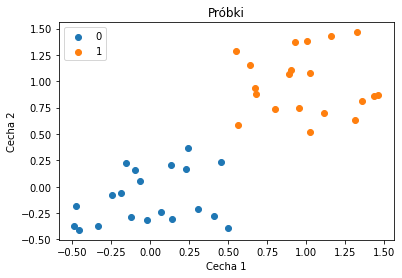

Dodatkowe zasoby:
* `pyplot`: <https://matplotlib.org/tutorials/introductory/pyplot.html>

Text(0, 0.5, 'Cecha 8')

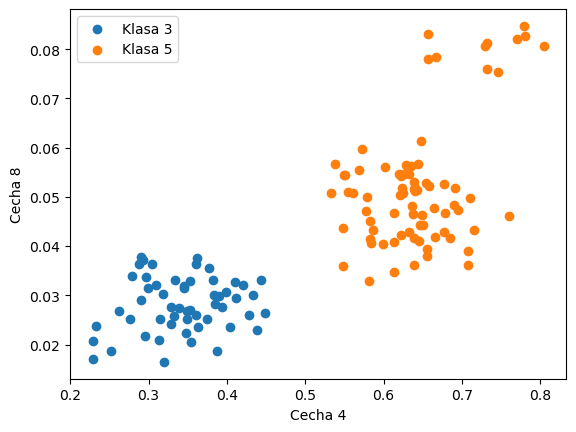

In [7]:
import matplotlib.pyplot as plt

klasy = [3, 5]
cechaX = 4
cechaY = 8

for klasa in klasy:
    kl = train_new[train_new[:, 0] == klasa]
    X = kl[:, 4]
    Y = kl[:, 8]
    plt.scatter(X, Y, label=f'Klasa {klasa}')


# kl3 = train_new[train_new[:, 0] == 3]
# cechaX3 = kl3[:, 4]
# cechaY3 = kl3[:, 8]


# plt.scatter(cechaX3, cechaY3, label='Klasa 3')


# kl5 = train_new[train_new[:, 0] == 5]
# cechaX5 = kl5[:, 4]
# cechaY5 = kl5[:, 8]
# plt.scatter(cechaX5, cechaY5, label='Klasa 5')


plt.legend()
plt.xlabel(f"Cecha {cechaX}")
plt.ylabel(f"Cecha {cechaY}")

### Zadanie 5

Zaimplementuj funkcję `edist`, która zwróci _odległość Euklidesa_ pomiędzy punktem `x` oraz `y` uwzględniający wybrane cechy `features`.

$$
d(x, y) = \sqrt{\sum^{n-1}_{i=0}{(x_i - y_i)^2}}
$$

In [8]:
# <UZUPEŁNIJ PONIZEJ>
import math
features = [1, 2] # kolumny o indeksach 1, 2
x = [0, 2, 3]
y = [0, 5, 6]

def edist(x, y, features):
    
    return sum([ (x[i] - y[i]) ** 2 for i in features])**0.5

edist(x, y, features) # wynik: 4.242640687119285

4.242640687119285

### Zadanie 6

Zaimplementuj klasyfikator najbliższego sąsiada. 
1. Oblicz odległość każdego elementu ze zbioru _testowego_ do każdego elementu ze zbioru _treningowego_. 
2. Odnajdź taki element ze zbioru _treningowego_, którego odległość do klasyfikowanego elementu (ze zbioru _testowego_) jest najmniejsza.
3. Przypisz klasyfikowanemu elementowi klasę.


In [26]:
klasyfikator = []
for element in test_new:
    for cecha in train_new:
        suma = 0
        for i in range(3, 16):
            suma += math.sqrt((element[i] - cecha[i]) ** 2)
            klasyfikator.append(suma)
index = test_new.where(test_new[0] == max(klasyfikator))
print(index)

AttributeError: 'numpy.ndarray' object has no attribute 'where'

### Zadanie 7
Przeprowadź klasyfikację liści wybranych wcześniej (dwóch) klas korzystając z własnej implementacji modelu kNN, a następnie wyświetl wyniki klasyfikacji (próbki treningowe i testowe), każdą klasę w innym kolorze, a próbki testowe innym "markerem".

> Wykorzystaj parametry: `facecolors`, `edgecolors`, `marker` i `c` funkcji `scatter`.

In [ ]:
# <UZUPEŁNIJ>

### Zadanie 8

Oblicz dokładność (*Accuracy*) klasyfikacji (stosunek poprawnie zaklasyfikowanych próbek do liczby wszystkich próbek wyrażony procentowo).

$$
\texttt{Accuracy} = \frac{T}{N}
$$

gdzie $T$ - liczba poprawnie zaklasyfikowanych próbek, $N$ - liczba wszystkich próbek.


In [ ]:
# <UZUPEŁNIJ>

### Zadanie 9

Wybierz 5 dowolnych rodzajów liści (klasy) i przeprowadź eksperyment ponownie.


In [ ]:
# <UZUPEŁNIJ>

### Zadanie 10

Przeprowadź eksperyment ponownie dla takich samych parametrów jak w zad. 9, ale większej losowo wybranej liczby cech: 3, 5, 10.

> W tym przypadku nie wyświetlaj wykresu a jedynie oblicz dokładność klasyfikacji.

In [ ]:
# <UZUPEŁNIJ>

### Zadanie 11

Napisz wnioski z przeprowadzonego eksperymentu.

In [ ]:
"""
<TU NAPISZ WNIOSKI>

"""